In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from math import nan

from CASutils import averaging_utils as avg
from CASutils import colormap_utils as mycolors
from CASutils import colorbar_utils as cbars

In [2]:
plotpath="/project/cas/islas/python_plots/singleforcing_paper/figures/supplemental/"

In [3]:
landfrac=xr.open_dataset("/project/cas/islas/cesm2le/fx/LANDFRAC_LENS2.nc")

In [4]:
def preprocessor(ds):
    ds = ds.sel(time=slice("1920-01","2050-12"))
    ds = ds.mean('M')
    return ds

### Read in CESM2 data

In [5]:
baselens2='/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2/'
fsds_lens2 = xr.open_mfdataset(baselens2+'LENS2_FSDS_50n90n_land_notland.nc', preprocess=partial(preprocessor))
fsns_lens2 = xr.open_mfdataset(baselens2+'LENS2_FSNS_50n90n_land_notland.nc', preprocess=partial(preprocessor))
fsus_lens2 = fsds_lens2 - fsns_lens2

In [6]:
basexaer2='/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM2-XAAER/'
fsds_xaer2 = xr.open_mfdataset(basexaer2+'xAER_FSDS_50n90n_land_notland.nc', preprocess=partial(preprocessor))
fsns_xaer2 = xr.open_mfdataset(basexaer2+'xAER_FSNS_50n90n_land_notland.nc', preprocess=partial(preprocessor))
fsus_xaer2 = fsds_xaer2 - fsns_xaer2

In [7]:
baseaer2='/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/'
fsds_aer2 = xr.open_mfdataset(baseaer2+'AAER_FSDS_50n90n_land_notland.nc', preprocess=partial(preprocessor))
fsns_aer2 = xr.open_mfdataset(baseaer2+'AAER_FSNS_50n90n_land_notland.nc', preprocess=partial(preprocessor))
fsus_aer2 = fsds_aer2 - fsns_aer2

In [8]:
year = fsus_lens2.land[fsus_lens2.time.dt.month == 1].time.dt.year
fsus_lens2_monthly_land = xr.DataArray(np.zeros([int(fsus_lens2.time.size/12), 12]),dims=['year','month'], coords=[year, np.arange(0,12,1)],name='FSUS')
fsus_aer2_monthly_land = xr.DataArray(np.zeros([int(fsus_lens2.time.size/12), 12]),dims=['year','month'], coords=[year, np.arange(0,12,1)],name='FSUS')
fsus_xaer2_monthly_land = xr.DataArray(np.zeros([int(fsus_lens2.time.size/12), 12]),dims=['year','month'], coords=[year, np.arange(0,12,1)],name='FSUS')

fsus_lens2_monthly_notland = xr.DataArray(np.zeros([int(fsus_lens2.time.size/12), 12]),dims=['year','month'], coords=[year, np.arange(0,12,1)],name='FSUS')
fsus_aer2_monthly_notland = xr.DataArray(np.zeros([int(fsus_lens2.time.size/12), 12]),dims=['year','month'], coords=[year, np.arange(0,12,1)],name='FSUS')
fsus_xaer2_monthly_notland = xr.DataArray(np.zeros([int(fsus_lens2.time.size/12), 12]),dims=['year','month'], coords=[year, np.arange(0,12,1)],name='FSUS')

for imon in np.arange(1,12,1):
    fsus_lens2_monthly_land[:,imon-1] = fsus_lens2.land[fsus_lens2.time.dt.month == imon]
    fsus_aer2_monthly_land[:,imon-1] = fsus_aer2.land[fsus_aer2.time.dt.month == imon] 
    fsus_xaer2_monthly_land[:,imon-1] = fsus_xaer2.land[fsus_xaer2.time.dt.month == imon]
    
    fsus_lens2_monthly_notland[:,imon-1] = fsus_lens2.notland[fsus_lens2.time.dt.month == imon]
    fsus_aer2_monthly_notland[:,imon-1] = fsus_aer2.notland[fsus_aer2.time.dt.month == imon] 
    fsus_xaer2_monthly_notland[:,imon-1] = fsus_xaer2.notland[fsus_xaer2.time.dt.month == imon]

In [9]:
fsus_lens2_land_base = fsus_lens2_monthly_land.sel(year=slice(1920,1940)).mean('year')
fsus_aer2_land_base = fsus_aer2_monthly_land.sel(year=slice(1920,1940)).mean('year')
fsus_xaer2_land_base = fsus_xaer2_monthly_land.sel(year=slice(1920,1940)).mean('year')

fsus_lens2_notland_base = fsus_lens2_monthly_notland.sel(year=slice(1920,1940)).mean('year')
fsus_aer2_notland_base = fsus_aer2_monthly_notland.sel(year=slice(1920,1940)).mean('year')
fsus_xaer2_notland_base = fsus_xaer2_monthly_notland.sel(year=slice(1920,1940)).mean('year')

In [10]:
fsus_lens2_monthly_land = fsus_lens2_monthly_land - fsus_lens2_land_base
fsus_aer2_monthly_land = fsus_aer2_monthly_land - fsus_aer2_land_base
fsus_xaer2_monthly_land = fsus_xaer2_monthly_land - fsus_xaer2_land_base

fsus_lens2_monthly_notland = fsus_lens2_monthly_notland - fsus_lens2_notland_base
fsus_aer2_monthly_notland = fsus_aer2_monthly_notland - fsus_aer2_notland_base
fsus_xaer2_monthly_notland = fsus_xaer2_monthly_notland - fsus_xaer2_notland_base

In [11]:
fsus_aer2xway_monthly_land = fsus_lens2_monthly_land - fsus_xaer2_monthly_land
fsus_aer2xway_monthly_notland = fsus_lens2_monthly_notland - fsus_xaer2_monthly_notland

In [12]:
### Calculate 21 year running means
def calc21ymean(dat):
    datm = dat.rolling(year=21, min_periods=21, center='True').mean('year').dropna('year')
    return datm

In [13]:
fsus_aer2_monthly_land_21y = calc21ymean(fsus_aer2_monthly_land).load()
fsus_aer2xway_monthly_land_21y = calc21ymean(fsus_aer2xway_monthly_land).load()

fsus_aer2_monthly_notland_21y = calc21ymean(fsus_aer2_monthly_notland).load()
fsus_aer2xway_monthly_notland_21y = calc21ymean(fsus_aer2xway_monthly_notland).load()

In [14]:
fsusdif_land = fsus_aer2_monthly_land_21y - fsus_aer2xway_monthly_land_21y
fsusdif_notland = fsus_aer2_monthly_notland_21y - fsus_aer2xway_monthly_notland_21y

In [16]:
#bootstrap = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig6/CESM2_bootstrap.nc")

In [17]:
#signifdat_land = xr.DataArray(np.ones([fsusdif_land.year.size, fsusdif_land.month.size]), 
#                         coords=[fsusdif_land.year, fsusdif_land.month],
#                         dims=['year','month'], name='signifdat_land')
#signifdat_land = xr.where( (fsusdif_land > bootstrap.min95_land) & (fsusdif_land < bootstrap.max95_land), 1, nan) 


#signifdat_notland = xr.DataArray(np.ones([fsusdif_land.year.size, fsusdif_land.month.size]), 
#                         coords=[fsusdif_land.year, fsusdif_land.month],
#                         dims=['year','month'], name='signifdat_land')
#signifdat_notland = xr.where( (fsusdif_land > bootstrap.min95_land) & (fsusdif_land < bootstrap.max95_land), 1, nan) 

### Plot the seasonal cycle of the AAER2$-$(LENS2$-$XAAER2) difference in surface SW up.

In [18]:
def plotmonthyear(dat, signifdat, ci, cmin, cmax, x1, x2, y1, y2,titlestr):
    dat = dat.transpose("month","year")
    signifdat = signifdat.transpose("month","year")
    nlevs = (cmax-cmin)/ci + 1
    clevs = np.arange(cmin, cmax+ci,ci)
    mymap = mycolors.blue2red_cmap(nlevs)
    ax = fig.add_axes([x1, y1, (x2-x1), (y2-y1)])
    ax.set_title(titlestr, fontsize=16)
    ax.contourf(dat.year, dat.month, dat, levels=clevs, cmap=mymap, extend='both')
    ax.set_xlim(1930,2040)
    ax.set_ylim(0,11)
    ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11])
    ax.set_yticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'], fontsize=14)
    ax.set_ylabel('Month', fontsize=14)
    ax.set_xticks([1940,1960,1980,2000,2020,2040])
    ax.set_xticklabels(['1940','1960','1980','2000','2020','2040'], fontsize=14)
    
    ax.contourf(signifdat.year, signifdat.month, signifdat, levels=[0,1], colors='lightgray')
    
    clevs = clevs[np.abs(clevs) >= ci]
    ax.contour(dat.year, dat.month, dat, levels=clevs, colors='black')
    
    return ax

/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/matplotlib/contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/matplotlib/contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


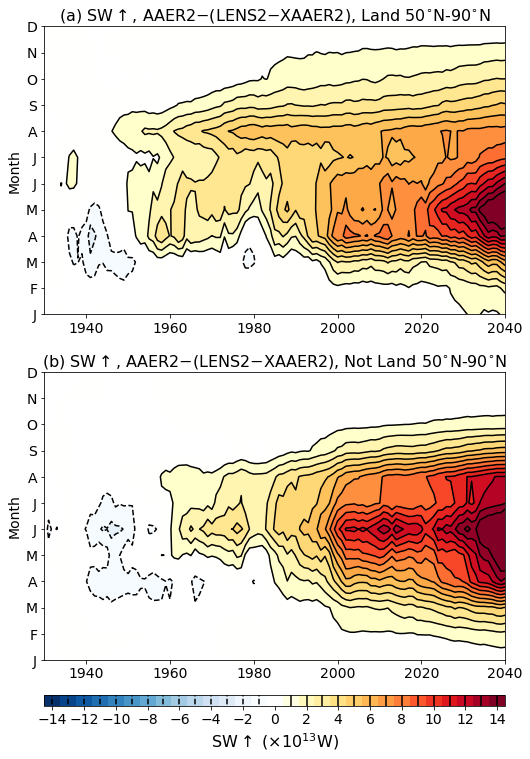

In [20]:
# Note - removing the significance shading here as it looks kind of messy and all the colored regions are pretty much significant
fig = plt.figure(figsize=(16,16))

ax = plotmonthyear(fsusdif_land/1e13, fsusdif_land*nan, 1,-14,14,0.05,0.45,0.7,0.95,
                   '(a) SW$\\uparrow$, AAER2$-$(LENS2$-$XAAER2), Land 50$^{\circ}$N-90$^{\circ}$N')

ax = plotmonthyear(fsusdif_notland/1e13, fsusdif_notland*nan, 1,-14,14,0.05,0.45,0.4,0.65,
                   '(b) SW$\\uparrow$, AAER2$-$(LENS2$-$XAAER2), Not Land 50$^{\circ}$N-90$^{\circ}$N')

ax = cbars.plotcolorbar(fig, 1, -14, 14, 'SW$\\uparrow$ ($\\times$10$^{13}$W)',
                        0.05,0.45,0.36,0.37, contourlines=True, 
                       ticks=[-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14])

fig.savefig(plotpath+'figS6.pdf', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'figS6.png', bbox_inches='tight', facecolor='white')

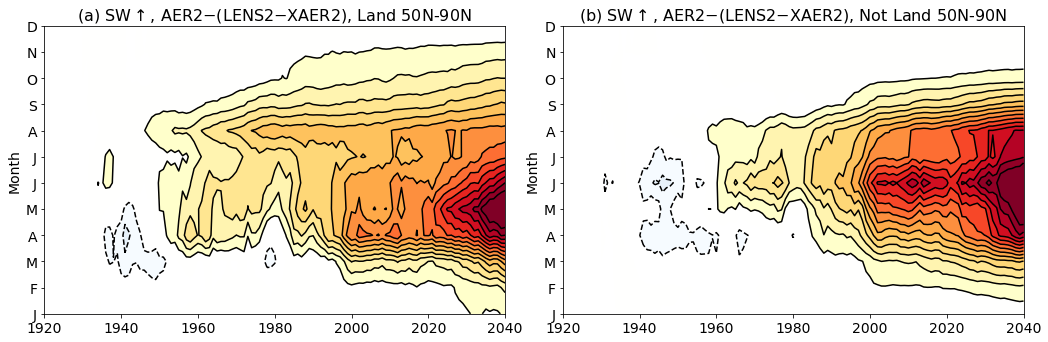

In [74]:
fig = plt.figure(figsize=(16,16))

ax = plotmonthyear(fsus_land_50n90n_m/1e13,1,-14,14,0.05,0.45,0.7,0.95,'(a) SW$\\uparrow$, AER2$-$(LENS2$-$XAER2), Land 50N-90N')

ax = plotmonthyear(fsus_notland_50n90n_m/1e13,1,-14,14,0.5,0.9,0.7,0.95,'(b) SW$\\uparrow$, AER2$-$(LENS2$-$XAER2), Not Land 50N-90N')

In [58]:
test = fsus_land_50n90n_m.mean('month')

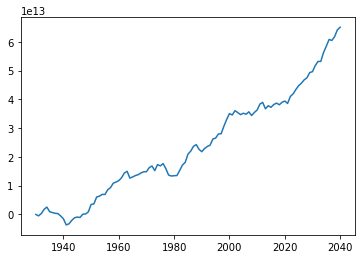

In [59]:
plt.plot(test.year, test)